In [30]:
# import all necessary libraries

from __future__ import print_function
from __future__ import division
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.animation

import scipy.io

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator

from keras.layers import Activation, Dense

from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_shape = (32,32,3)  # adapt this if using `channels_first` image data format

model = Sequential()

x1 = (Conv2D(16, kernel_size=(3, 3),input_shape=input_shape, padding = 'same'))
model.add(x1)
convout1 = Activation('relu')
model.add(convout1)
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(8, (3, 3), padding = 'same'))
#convout2 = Activation('relu')
#model.add(convout2)
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(8, (3, 3),strides=(1, 1), padding = 'same'))
#convout3 = Activation('relu')
#model.add(convout3)
#encoded = (MaxPooling2D(pool_size=(2, 2)))
#model.add(encoded)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

#model.add(Conv2D(8, (3, 3), padding = 'same'))
#convout4 = Activation('relu')
#model.add(convout4)
#model.add(UpSampling2D((2, 2)))

#model.add(Conv2D(8, (3, 3), padding = 'same'))
#convout5 = Activation('relu')
#model.add(convout5)
#model.add(UpSampling2D((2, 2)))

#model.add(Conv2D(16, (3, 3), padding = 'same'))
#convout6 = Activation('relu')
#model.add(convout6)
#model.add(UpSampling2D((2, 2)))

#model.add(Conv2D(16, (3, 3), padding = 'same'))
#decoded = Activation('sigmoid')
#model.add(decoded)

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adagrad(lr = 0.00000001),
              metrics=['accuracy'])

datagen = ImageDataGenerator(
        featurewise_center=True,  # set input mean to 0 over the dataset
        samplewise_center=True,  # set each sample mean to 0
        featurewise_std_normalization=True,  # divide inputs by std of the dataset
        samplewise_std_normalization=True,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        shear_range=0.1,
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

datagen.fit(x_train)

# Fit the model on the batches generated by datagen.flow().
model.fit_generator(datagen.flow(x_train, x_train,
                                 shuffle=True,
                                 batch_size=128),
                    steps_per_epoch=int(np.ceil(x_train.shape[0] / float(128))),
                    epochs=50,
                    validation_data=(x_test, x_test),
                    workers=4)

#x2 = MaxPooling2D((2, 2), padding='same')
#x3 = Conv2D(8, (3, 3), activation='relu', padding='same')(x2)
#x4 = MaxPooling2D((2, 2), padding='same')(x3)
#x5 = Conv2D(8, (3, 3), activation='relu', padding='same')(x4)
#encoded = MaxPooling2D((2, 2), padding='same')(x5)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

#x6 = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
#x7 = UpSampling2D((2, 2))(x6)
#x8 = Conv2D(8, (3, 3), activation='relu', padding='same')(x7)
#x9 = UpSampling2D((2, 2))(x8)
#x10 = Conv2D(16, (3, 3), activation='relu', padding='same')(x9)
#x11 = UpSampling2D((2, 2))(x10)
#decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x11)

#autoencoder = Model(input_img, decoded)
#autoencoder.compile(optimizer='adagrad', loss='binary_crossentropy')

In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(32, 32, 3))  # adapt this if using `channels_first` image data format

x1 = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x2 = MaxPooling2D((2, 2), padding='same')(x1)
x3 = Conv2D(8, (3, 3), activation='relu', padding='same')(x2)
x4 = MaxPooling2D((2, 2), padding='same')(x3)
x5 = Conv2D(8, (3, 3), activation='relu', padding='same')(x4)
encoded = MaxPooling2D((2, 2), padding='same')(x5)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x6 = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x7 = UpSampling2D((2, 2))(x6)
x8 = Conv2D(8, (3, 3), activation='relu', padding='same')(x7)
x9 = UpSampling2D((2, 2))(x8)
x10 = Conv2D(16, (3, 3), activation='relu', padding='same')(x9)
x11 = UpSampling2D((2, 2))(x10)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x11)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adagrad', loss='binary_crossentropy')

In [9]:
from keras.datasets import cifar10
import numpy as np

(x_train, _), (x_test, _) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 32, 32, 3))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 32, 32, 3))  # adapt this if using `channels_first` image data format

In [11]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 107s - loss: 0.6156 - val_loss: 0.6095
Epoch 2/50
50000/50000 [==============================] - 106s - loss: 0.6014 - val_loss: 0.6015
Epoch 3/50
50000/50000 [==============================] - 105s - loss: 0.5973 - val_loss: 0.5948
Epoch 4/50
50000/50000 [==============================] - 109s - loss: 0.5934 - val_loss: 0.5927
Epoch 5/50
50000/50000 [==============================] - 109s - loss: 0.5917 - val_loss: 0.5929
Epoch 6/50
50000/50000 [==============================] - 106s - loss: 0.5906 - val_loss: 0.5904
Epoch 7/50
50000/50000 [==============================] - 105s - loss: 0.5897 - val_loss: 0.5898
Epoch 8/50
50000/50000 [==============================] - 105s - loss: 0.5890 - val_loss: 0.5898
Epoch 9/50
50000/50000 [==============================] - 108s - loss: 0.5884 - val_loss: 0.5886
Epoch 10/50
50000/50000 [==============================] - 109s - loss: 0.587

In [12]:
autoencoder.save("cifar10_vis.tfl")

In [13]:
autoencoder.load("cifar10_vis.tfl")

AttributeError: 'Model' object has no attribute 'load'

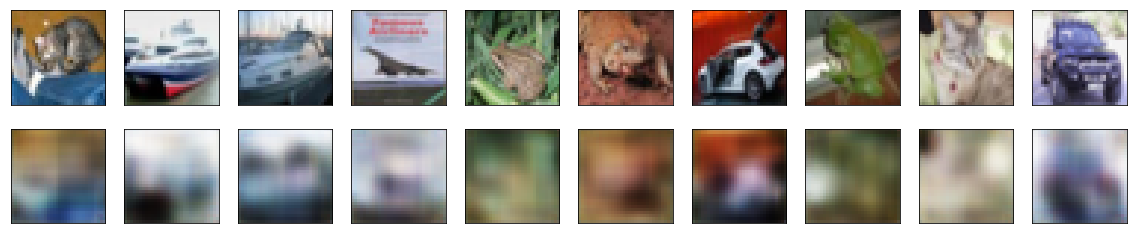

In [14]:
import matplotlib.pyplot as plt

decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [15]:
from keras import backend as K

In [99]:
# K.learning_phase() is a flag that indicates if the network is in training or
# predict phase. It allow layer (e.g. Dropout) to only be applied during training
inputs = [K.learning_phase()] + autoencoder.inputs

_layer1_f = K.function(inputs, [x2])
def convout1_f(X):
    # The [0] is to disable the training phase flag
    return _layer1_f([0] + [X])

_layer2_f = K.function(inputs, [x4])
def convout2_f(X):
    # The [0] is to disable the training phase flag
    return _layer2_f([0] + [X])

_layer3_f = K.function(inputs, [encoded.output])
def convout3_f(X):
    # The [0] is to disable the training phase flag
    return _layer3_f([0] + [X])

_up_layer1_f = K.function(inputs, [x6])
def convout4_f(X):
    # The [0] is to disable the training phase flag
    return _up_layer1_f([0] + [X])

_up_layer2_f = K.function(inputs, [x8])
def convout5_f(X):
    # The [0] is to disable the training phase flag
    return _up_layer2_f([0] + [X])

_up_layer3_f = K.function(inputs, [x10])
def convout6_f(X):
    # The [0] is to disable the training phase flag
    return _up_layer3_f([0] + [X])


In [68]:
x2

<tf.Tensor 'max_pooling2d_7/MaxPool:0' shape=(?, 16, 16, 16) dtype=float32>

In [85]:
i = 1
X = x_test[i:i+1]

In [86]:
convout1_f

<function __main__.convout1_f>

In [87]:
np.array(convout1_f(X)).shape

(1, 1, 4, 4, 8)

In [88]:
np.squeeze(np.squeeze(np.array(convout1_f(X)),0),0).shape

(4, 4, 8)

### Plotting the first convnet/output layer_1 with sample first test image


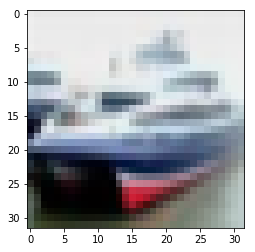

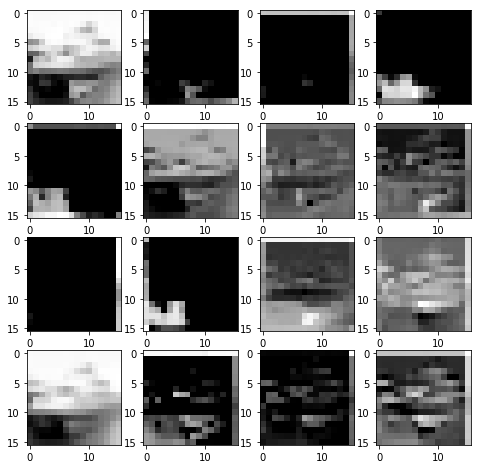

In [104]:
#Plotting conv_1
i = 1
X = x_test[i:i+1]
check = np.squeeze(np.squeeze(np.array(convout1_f(X)),0),0)

temp = X[0,:,:,:]
plt.imshow(temp)
plt.figure(figsize=(2,2))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

k = 0
while k < check.shape[2]:
    #plt.figure()
    #plt.subplot(231 + i)
    fig, axes = plt.subplots(4, 4, figsize=(8, 8))
    for i in range(4):
        for j in range(4):
            axes[i,j].imshow(check[:,:,k])
            k += 1
    #axes[0, 0].imshow(R, cmap='jet')
    #plt.imshow(check[:,:,i])

plt.show()

In [101]:
check.shape

(16, 16, 16)

### Plotting second layer

In [107]:
i = 1
X = x_test[i:i+1]
check = np.squeeze(np.squeeze(np.array(convout2_f(X)),0),0)
check.shape

(8, 8, 8)

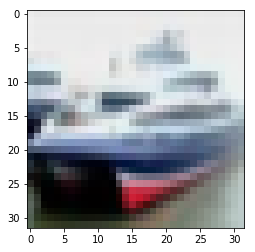

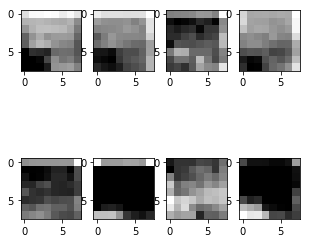

In [119]:
#Plotting conv_2

temp = X[0,:,:,:]
plt.imshow(temp)
fig = plt.figure()
fig.set_figheight(2)
fig.set_figwidth(2)
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

k = 0
while k < check.shape[2]:
    #plt.figure()
    #plt.subplot(231 + i)
    fig, axes = plt.subplots(2, 4, figsize=(5, 5))
    for i in range(2):
        for j in range(4):
            axes[i,j].imshow(check[:,:,k])
            k += 1
    #axes[0, 0].imshow(R, cmap='jet')
    #plt.imshow(check[:,:,i])

plt.show()

### Plotting the final encoded layer before upsampling

In [120]:
i = 1
X = x_test[i:i+1]
check = np.squeeze(np.squeeze(np.array(convout3_f(X)),0),0)
check.shape

InvalidArgumentError: Shape [-1,32,32,3] has negative dimensions
	 [[Node: conv2d_61_input = Placeholder[dtype=DT_FLOAT, shape=[?,32,32,3], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'conv2d_61_input', defined at:
  File "C:\Users\Tejas\Anaconda3\envs\tensorflow\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Tejas\Anaconda3\envs\tensorflow\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Tejas\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Tejas\Anaconda3\envs\tensorflow\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Tejas\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\Tejas\Anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\Tejas\Anaconda3\envs\tensorflow\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\Tejas\Anaconda3\envs\tensorflow\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Tejas\Anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\Tejas\Anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\Tejas\Anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\Tejas\Anaconda3\envs\tensorflow\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Tejas\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\Tejas\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\Tejas\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\Tejas\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\Tejas\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\Tejas\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Tejas\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\Tejas\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-38-1d14d142f75c>", line 10, in <module>
    model.add(x1)
  File "C:\Users\Tejas\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py", line 438, in add
    dtype=layer.dtype, name=layer.name + '_input')
  File "C:\Users\Tejas\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\topology.py", line 1436, in Input
    input_tensor=tensor)
  File "C:\Users\Tejas\Anaconda3\envs\tensorflow\lib\site-packages\keras\legacy\interfaces.py", line 87, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\Tejas\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\topology.py", line 1347, in __init__
    name=self.name)
  File "C:\Users\Tejas\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py", line 442, in placeholder
    x = tf.placeholder(dtype, shape=shape, name=name)
  File "C:\Users\Tejas\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1530, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\Users\Tejas\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 1954, in _placeholder
    name=name)
  File "C:\Users\Tejas\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "C:\Users\Tejas\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\Users\Tejas\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Shape [-1,32,32,3] has negative dimensions
	 [[Node: conv2d_61_input = Placeholder[dtype=DT_FLOAT, shape=[?,32,32,3], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [123]:
encoded.output

<tf.Tensor 'max_pooling2d_30/MaxPool:0' shape=(?, 4, 4, 8) dtype=float32>

In [122]:
x4

<tf.Tensor 'max_pooling2d_8/MaxPool:0' shape=(?, 8, 8, 8) dtype=float32>

In [126]:
convout4_f(X)

[array([[[[ 0.32386386,  0.50516582,  0.36640173,  0.8024354 ,  0.57064784,
            0.8743332 ,  0.        ,  0.95699823],
          [ 0.48214975,  0.36414742,  0.61054087,  0.90861815,  0.56260395,
            1.41562545,  0.39653221,  1.20781612],
          [ 0.60142523,  0.39359286,  0.57789183,  0.91635448,  0.59735429,
            1.24216068,  0.25198364,  1.17144477],
          [ 0.11402246,  0.81889451,  0.55176383,  0.90914124,  0.39311817,
            1.13892376,  0.38477036,  1.15497208]],
 
         [[ 0.84170151,  0.59371936,  0.54499745,  0.87282729,  0.98077345,
            0.70124364,  0.05170501,  1.05774832],
          [ 0.68621188,  0.46214247,  0.572447  ,  1.09819674,  0.52370465,
            1.64384949,  0.69812804,  1.05934894],
          [ 0.78153068,  0.47761995,  0.53246397,  1.26718128,  0.43076485,
            1.57986879,  0.43105993,  0.94172275],
          [ 0.43352658,  1.12032509,  0.90016341,  0.90333927,  0.32796511,
            1.48024166,  0.56079

In [128]:
import tflearn

autoencoder.load('cifar10_vis.tfl')

ImportError: No module named 'tflearn'